# Notebook for ModelFlow 
## Update system path

In [36]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

## Import dependency

In [37]:
from dotenv import load_dotenv
from IPython.display import display

from uniflow.client import Client
from uniflow.flow.flow_factory import FlowFactory
from uniflow.config import Config
from uniflow.model.config import OpenAIModelConfig
from uniflow.viz import Viz

load_dotenv()

True

In [38]:
FlowFactory.list()

['LinearFlow',
 'ModelFlow',
 'OpenAIJsonModelFlow',
 'HuggingFaceModelFlow',
 'LMQGModelFlow',
 'FewShotModelFlow']

## Run model flow to generate data

In [39]:
data = [{
    "instruction": """Generate one question and its corresponding answer based on the context. Following the format of the examples below to include context, question, and answer in the response.""",
    "examples": [
        {
            "context": """The quick brown fox jumps over the lazy dog.""",
            "question": """What is the color of the fox?""",
            "answer": """brown."""
        },
        {
            "context": """The quick brown fox jumps over the lazy black dog.""",
            "question": """What is the color of the dog?""",
            "answer": """black."""
        },
        {
            "context": """It was a sunny day and the sky color is blue.""",
            "question": """""",
            "answer": """""",
        }
    ],
},
        {
    "instruction": """Generate one question and its corresponding answer based on the context. Following the format of the examples below to include context, question, and answer in the response.""",
    "examples": [
        {
            "context": """The quick brown fox jumps over the lazy dog.""",
            "question": """What is the color of the fox?""",
            "answer": """brown."""
        },
        {
            "context": """The quick brown fox jumps over the lazy black dog.""",
            "question": """What is the color of the dog?""",
            "answer": """black."""
        },
        {
            "context": """My name is bobby and I am a talent software engineer working on AI/ML.""",
            "question": """""",
            "answer": """""",
        }
    ],
}]


In [40]:
config = Config(model_config=OpenAIModelConfig())
client = Client(config)

In [41]:
output = client.run(data)

100%|██████████| 2/2 [00:03<00:00,  1.84s/it]


In [42]:
output[0]['output'][0]

{'response': [{'context': 'It was a sunny day and the sky color is blue.',
   'question': 'What is the color of the sky?',
   'answer': 'blue.'}],
 'error': 'Failed to deserialize 0 examples'}

## Plot model flow graph

In [43]:
graph = Viz.to_digraph(output[0]['root'])

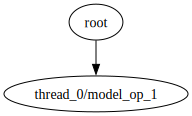

In [44]:
display(graph)

In [45]:
graph = Viz.to_digraph(output[1]['root'])

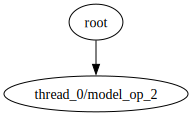

In [46]:
display(graph)